In [1]:
# Import all libraries needed for the tutorial
import pandas as pd
import numpy as np
import psycopg2
import sys
from pandas.io import sql
from pandas.io.sql import read_sql
import statsmodels.api as sm
import statsmodels.formula.api as smf

#pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

print('This Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

This Python version 3.4.3 |Anaconda 2.2.0 (x86_64)| (default, Mar  6 2015, 12:07:41) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version 0.16.1


In [2]:
con = psycopg2.connect("dbname=testdb user=tim")  
#cur = con.cursor()
print("con is open")

con is open


In [3]:
sql = "SELECT * FROM vam WHERE vam.grade = %s AND vam.year = %s ORDER BY vam.school_id;"

data2012 = pd.read_sql(sql, con, index_col=None, coerce_float=True, params=['5th Grade','2012'], parse_dates=None, columns=None, chunksize=None)

data2013 = pd.read_sql(sql, con, index_col=None, coerce_float=True, params=['5th Grade','2013'], parse_dates=None, columns=None, chunksize=None)

if con:
    con.close()

In [4]:
data2012[:4]

,school_name,school_id,network,grade,year,reading_studentsnumber,reading_vam,reading_confidence,reading_percentile,reading_color,math_studentsnumber,math_vam,math_confidence,math_percentile,math_color
0,"LOCKE, A CHTR",400011,Charter/Contract Schools,5th Grade,2012,44.0,0.5,-0.6 to 1.6,68,Yellow,44.0,0.8,0 to 1.6,79,Green
1,AMANDLA CHTR HS,400012,Charter/Contract Schools,5th Grade,2012,39.4,-0.2,-1.3 to 1,42,Yellow,39.4,-0.7,-1.6 to 0.1,21,Yellow
2,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,Charter/Contract Schools,5th Grade,2012,66.0,-0.5,-1.4 to 0.5,29,Yellow,65.0,-0.5,-1.1 to 0.2,31,Yellow
3,CATALYST CHTR - HOWLAND,400020,Charter/Contract Schools,5th Grade,2012,46.9,0.1,-1 to 1.2,52,Yellow,24.6,0.8,-0.2 to 1.8,78,Yellow


In [5]:
data2013[:4]

,school_name,school_id,network,grade,year,reading_studentsnumber,reading_vam,reading_confidence,reading_percentile,reading_color,math_studentsnumber,math_vam,math_confidence,math_percentile,math_color
0,GLOBAL CITIZENSHIP CHTR,400009,Charter/Contract,5th Grade,2013,46,0.4,-0.7 to 1.4,65,Yellow,46,0.1,-0.5 to 0.7,54,Yellow
1,"LOCKE, A CHTR",400011,Charter/Contract,5th Grade,2013,39,0.6,-0.4 to 1.7,80,Yellow,39,1.4,0.7 to 2,92,Green
2,AMANDLA CHTR HS,400012,Charter/Contract,5th Grade,2013,38,0.4,-0.7 to 1.5,68,Yellow,37,-0.6,-1.3 to 0.2,28,Yellow
3,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,Charter/Contract,5th Grade,2013,49,0.1,-0.9 to 1,49,Yellow,49,-1.0,-1.6 to -0.4,12,Red


In [6]:
left = data2012
right = data2013
result = pd.merge(left, right, on='school_id')
result.shape

(438, 29)

In [7]:
result[:4]

,school_name_x,school_id,network_x,grade_x,year_x,reading_studentsnumber_x,reading_vam_x,reading_confidence_x,reading_percentile_x,reading_color_x,math_studentsnumber_x,math_vam_x,math_confidence_x,math_percentile_x,math_color_x,school_name_y,network_y,grade_y,year_y,reading_studentsnumber_y,reading_vam_y,reading_confidence_y,reading_percentile_y,reading_color_y,math_studentsnumber_y,math_vam_y,math_confidence_y,math_percentile_y,math_color_y
0,"LOCKE, A CHTR",400011,Charter/Contract Schools,8th Grade,2012,40.0,-1.2,-2.4 to 0,9,Yellow,40.0,-0.1,-0.9 to 0.7,49,Yellow,"LOCKE, A CHTR",Charter/Contract,8th Grade,2013,42,0.4,-0.8 to 1.5,70,Yellow,42,0.0,-0.8 to 0.7,49,Yellow
1,AMANDLA CHTR HS,400012,Charter/Contract Schools,8th Grade,2012,87.2,-0.4,-1.4 to 0.6,37,Yellow,87.2,-1.2,-1.8 to -0.6,8,Red,AMANDLA CHTR HS,Charter/Contract,8th Grade,2013,66,-1.6,-2.6 to -0.6,1,Red,66,-1.6,-2.3 to -1,4,Red
2,ASPIRA CHTR - HAUGAN,400017,Charter/Contract Schools,8th Grade,2012,183.4,-0.6,-1.4 to 0.2,27,Yellow,183.4,-1.0,-1.4 to -0.6,13,Red,ASPIRA CHTR - HAUGAN,Charter/Contract,8th Grade,2013,224,0.2,-0.4 to 0.8,61,Yellow,223,-0.4,-0.7 to 0,34,Red
3,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,Charter/Contract Schools,8th Grade,2012,45.7,0.2,-1 to 1.4,65,Yellow,45.7,-1.8,-2.6 to -1.1,2,Red,BRONZEVILLE LTHOUSE CHTR CAMPUS,Charter/Contract,8th Grade,2013,40,-0.1,-1.3 to 1.1,45,Yellow,40,-1.2,-2.1 to -0.4,8,Red


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     24.40
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           1.12e-06
Time:                        22:32:33   Log-Likelihood:                -544.74
No. Observations:                 438   AIC:                             1093.
Df Residuals:                     436   BIC:                             1102.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0173      0.040      0.429      0.668        -0.062     0.096
x              0.2030      0.041      4.940      0.000         0.122     0.284
==============================================================================
Omnibus:                       21.858   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.851
Skew:                           0.082   Prob(JB):                     6.12e-14
Kurtosis:                       4.819   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

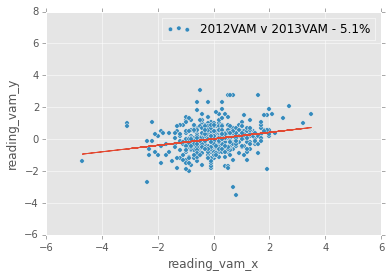

In [8]:
# different way, assign x and y
x = result['reading_vam_x']
y = result['reading_vam_y']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=result).fit()

result.plot(kind='scatter', x='reading_vam_x', y='reading_vam_y',label="2012VAM v 2013VAM - 5.1%")
plt.ylim(-6, 8)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     59.52
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           8.30e-14
Time:                        22:33:56   Log-Likelihood:                -580.93
No. Observations:                 438   AIC:                             1166.
Df Residuals:                     436   BIC:                             1174.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0389      0.044      0.890      0.374        -0.047     0.125
x              0.3361      0.044      7.715      0.000         0.250     0.422
==============================================================================
Omnibus:                        7.999   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.018   Jarque-Bera (JB):               10.320
Skew:                           0.172   Prob(JB):                      0.00574
Kurtosis:                       3.669   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

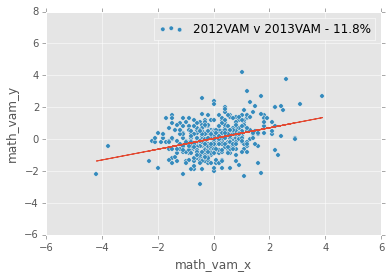

In [10]:
# different way, assign x and y
x = result['math_vam_x']
y = result['math_vam_y']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=result).fit()

result.plot(kind='scatter', x='math_vam_x', y='math_vam_y',label="2012VAM v 2013VAM - 11.8%")
plt.ylim(-6, 8)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()